# Аналіз впливу у лінійній регресії
 ## Бєлюкіна Тетяна
 Варіант 1

Мета: Проаналізувати лінійний вплив ціни закриття акцій.<br />
Я додала файли мого варіанту в окремий репозиторій і зчитала назви всіх файлів в наявному репозиторії. Далі ми поєднуємо всі датасети в один, беручи до уваги першу колонку і шосту(ціна закриття)

In [20]:
filenames <- list.files(path="quantquote_daily_sp500_83986/daily", full.names=TRUE)

datalist = lapply(filenames,
    function(x){x0<-read.csv(file=x,header=F)[,c(1,6)];
    colnames(x0)<-c("data",
    unlist(strsplit(x,"[_.]"))[7]);
    x0})

y<-Reduce(function(x,y) {merge(x,y,by="data")}, datalist)   

Ми намагаємось спрогнозувати на основі вчорашньої ціни закриття 9 компаній сьогоднішню ціну закриття нашої обраної компанії(adbe) Тому обрізаємо останній день для регресорів.

In [21]:
Data<-y[-nrow(y),-1] #delete the last raw and first column
Data$tomorrow_adbe<-y$adbe[-1] #delete first value in adbe

Підганяємо модель по останніх 50 сесіях

In [22]:
nn<-nrow(Data)
model1<-lm(tomorrow_adbe~.-adbe-tomorrow_adbe,data=Data[(nn-50):nn,])
summary(model1)


Call:
lm(formula = tomorrow_adbe ~ . - adbe - tomorrow_adbe, data = Data[(nn - 
    50):nn, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49468 -0.30517  0.01334  0.32780  1.74051 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 45.79405    7.89866   5.798 8.39e-07 ***
a            0.23166    0.21786   1.063   0.2938    
aa          -1.83273    1.39978  -1.309   0.1977    
aapl        -0.01291    0.01358  -0.951   0.3473    
abbv         0.44198    0.20929   2.112   0.0408 *  
abc          0.23660    0.12788   1.850   0.0715 .  
abt         -0.32971    0.27468  -1.200   0.2369    
ace          0.11774    0.12586   0.936   0.3550    
acn         -0.16760    0.06560  -2.555   0.0144 *  
act         -0.06501    0.05915  -1.099   0.2781    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6771 on 41 degrees of freedom
Multiple R-squared:  0.8942,	Adjusted R-squared:  0.8709 
F-statistic: 38.49 

In [23]:
model1$coef

(Intercept)           a          aa        aapl        abbv         abc 
45.79404848  0.23166129 -1.83272883 -0.01291103  0.44197697  0.23659560 
        abt         ace         acn         act 
-0.32970586  0.11774302 -0.16759543 -0.06500819

Наше p-value: < 2.2e-16, що говорить нам про те, що наша ціна доволі сильно корелює з вчорашніми цінами. Як ми бачимо у нас доволі непогана метрика Multiple R-squared. Але можемо звернути увагу що наща змінна значущо залежить від вільного члена(Intercept) і двох інших компаній - acn, abc і abbv

Давайте тепер спробуємо прибрати незначущі регресори і побудувати регресію наново

In [11]:
model2<-lm(tomorrow_adbe~abbv + acn + abc,data=Data[(nn-50):nn,])
summary(model2)


Call:
lm(formula = tomorrow_adbe ~ abbv + acn + abc, data = Data[(nn - 
    50):nn, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.80828 -0.67446  0.03971  0.65778  1.59023 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.20039    7.34189   5.612 1.04e-06 ***
abbv         0.03072    0.16657   0.184  0.85446    
acn         -0.25762    0.04978  -5.175 4.64e-06 ***
abc          0.41469    0.12409   3.342  0.00164 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.856 on 47 degrees of freedom
Multiple R-squared:  0.8061,	Adjusted R-squared:  0.7938 
F-statistic: 65.15 on 3 and 47 DF,  p-value: < 2.2e-16


Multiple R-squared ненабагато зменшився, що говорить, що в відкинутих регресорах було мало даних.  <br />
Спробуємо тепер прогнозувати ціну на основі вчорашньої ціни нашої компанії

In [12]:
model_yesterday <-lm(tomorrow_adbe~adbe,data=Data[(nn-50):nn,])
summary(model_yesterday)


Call:
lm(formula = tomorrow_adbe ~ adbe, data = Data[(nn - 50):nn, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26707 -0.34258 -0.02166  0.31714  2.26658 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.60634    2.03902   1.769   0.0832 .  
adbe         0.92337    0.04438  20.807   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6071 on 49 degrees of freedom
Multiple R-squared:  0.8983,	Adjusted R-squared:  0.8963 
F-statistic: 432.9 on 1 and 49 DF,  p-value: < 2.2e-16


Наша завтрішня ціна доволі сильно корелює з нашою сьогоднішньою. При цьому судячи по відносно невеликому зміненні Multiple R-squared інші регресори все таки не сильно впливають на нашу модель.

# Візуалізація

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
105,2.7895350,0.2184431,0.186623081
116,3.2499139,0.2285831,0.253780823
123,0.2517100,0.3185146,0.003030471
124,-0.3136421,0.3627770,0.005726301


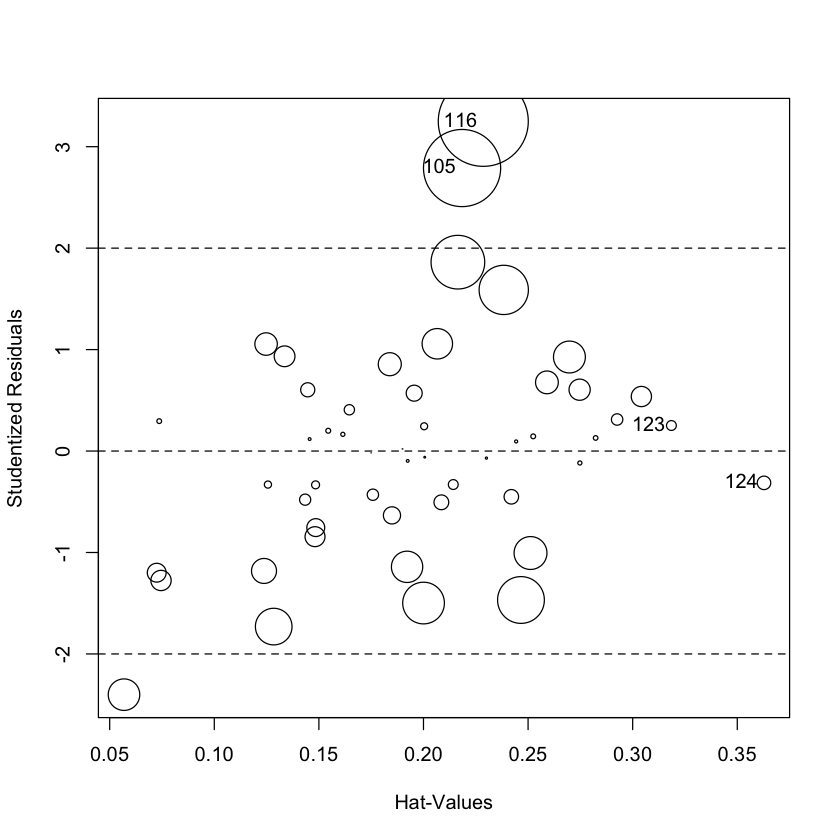

In [13]:
library(car)
influencePlot(model1)

Подивимось по 20 останнім данним, що не використовувались для моделювання відхидення від реальних значень

In [14]:
Data[(nn-70):(nn-51),]

,a,aa,aapl,abbv,abc,abt,ace,acn,act,adbe,tomorrow_adbe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
82,41.3144,8.43911,436.982,45.6011,53.8935,36.8011,88.6226,81.330,105.72,45.07,44.65
83,41.2048,8.37955,433.093,45.1453,53.6345,36.7613,87.8766,79.800,104.52,44.65,45.69
84,41.3643,8.39940,439.982,43.5896,54.6306,36.8808,88.1551,79.500,106.75,45.69,47.03
85,41.4441,8.56819,444.088,44.2634,54.3218,36.6169,89.3686,79.500,106.47,47.03,46.50
86,41.8729,8.63769,455.703,44.1346,54.1425,35.6857,90.1245,78.800,107.10,46.50,45.58
87,42.2618,8.56819,452.081,44.5111,54.7801,35.9157,90.8605,78.960,107.19,45.58,45.32
88,42.8103,8.78661,457.479,43.0842,54.8498,36.1040,91.7557,79.970,107.31,45.32,43.96
89,42.9798,8.74670,453.426,43.7679,54.5709,36.0093,91.2584,80.020,106.73,43.96,44.01
90,43.4684,8.66700,449.621,44.5854,54.6008,36.0044,91.0495,80.450,119.69,44.01,43.61


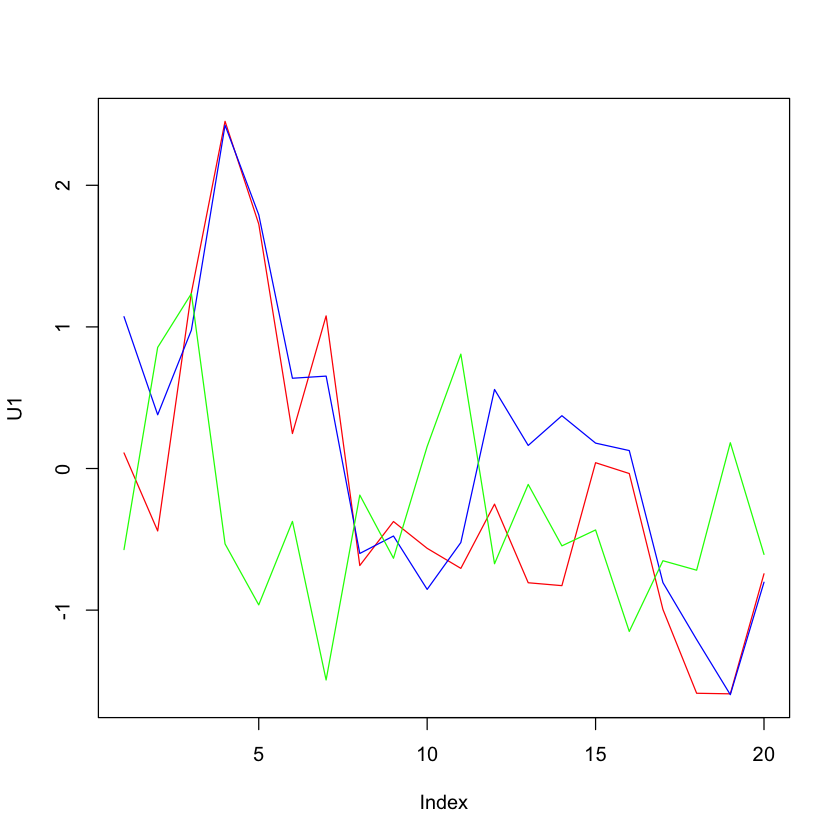

In [17]:
U1 <- Data$adbe[(nn-70):(nn-51)]-predict(model1,Data[(nn-70):(nn-51),])
U2 <- Data$adbe[(nn-70):(nn-51)]-predict(model2,Data[(nn-70):(nn-51),])
U3 <- Data$tomorrow_adbe[(nn-70):(nn-51)]-predict(model_yesterday,Data[(nn-70):(nn-51),])
plot(U1,type="l",col="red",ylim=c(min(U1,U2,U3),max(U1,U2,U3)))
lines(U2,col="blue")
lines(U3,col="green")

Можемо помітити що остання модель(зелений колір) найкраще впоралась. Можемо також використати MAE щоб упевнитись в цьому

In [18]:
library(Metrics)
cat('MAE:\n other_companies: ',mae(Data$adbe[(nn-70):(nn-51)],predict(model1,Data[(nn-70):(nn-51),])),
    '\n significant_companies: ',mae(Data$adbe[(nn-70):(nn-51)],predict(model2,Data[(nn-70):(nn-51),])),
    '\n yesterday data: ',mae(Data$tomorrow_adbe[(nn-70):(nn-51)],predict(model_yesterday,Data[(nn-70):(nn-51),])))

MAE:
 other_companies:  0.825092 
 significant_companies:  0.8100514 
 yesterday data:  0.6441675

Дійсно, остання модель впоралась найкраще, що в приниці доволі логічно.

# Висновок

Найкраще впоралась модель побудована на основі вчорашньої ціни нашої компанії - відхилення актуальних значень від спрогнозованих дуже маленьке. Звичайно ми також помітили вплив інших компаній, пов'язано це зі зміною глобальних показників (інфляція, криза і тд) які впливають на більшість компаній